In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
from sklearn.mixture import GaussianMixture as GMM

In [2]:
#file = 'preped_som_rfls.pickle'
file = r'/Users/varunpatro/Desktop/preped_som_rfls.pickle'

In [3]:
spectra = pickle.load(open(file, 'rb'))

In [4]:
seed = 8
# Running kmeans through all time points in time series
labels = []
km_predict_tpoints = []
inits = []
count = 0
for i in spectra.keys():
    time_point = spectra[i].copy()
    time_point_reshapen = time_point.reshape(time_point.shape[0]*time_point.shape[1], time_point.shape[2])
    if i == '20220224':
        kmeans = KMeans(init = 'k-means++', n_clusters = 7, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
    else:
        #print('count: ', count)
        #print('inits: ', inits)
        kmeans = KMeans(init = inits[count-1], n_clusters = 7, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
        
    count+= 1

/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/varunpatro/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kme

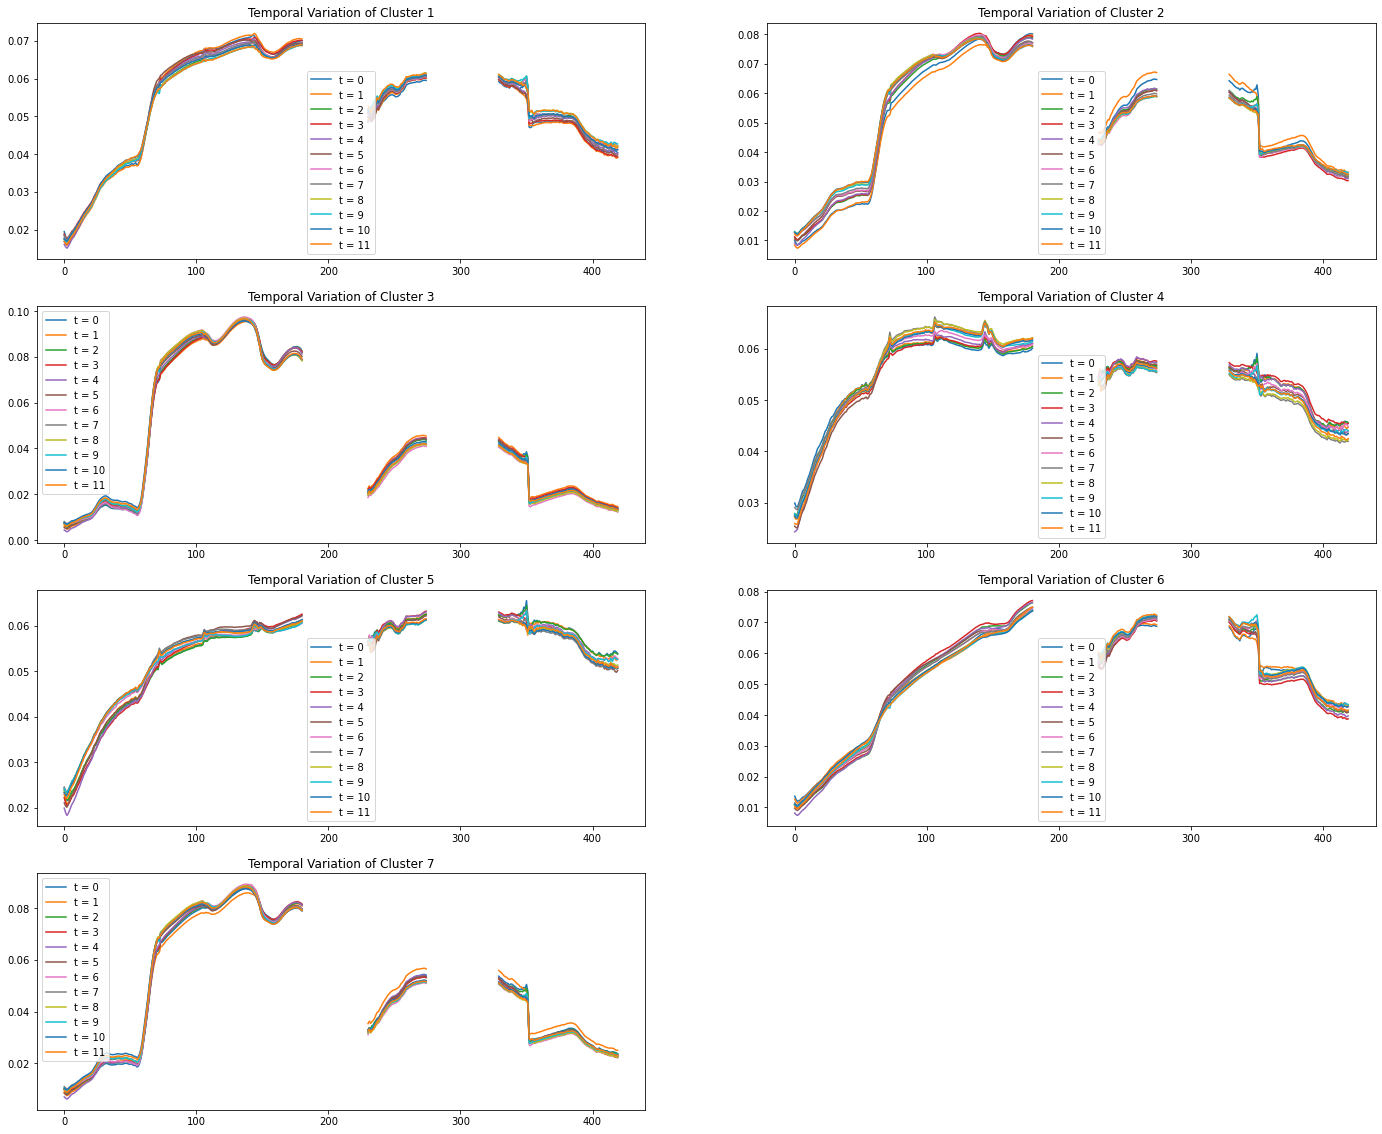

In [10]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (24,20))
for i in range(7):
    if i == 0:
        # plot center 1 over time

        mean_1_display = np.empty((12,425))
        mean_1_display[:] = np.nan

        for i in range(len(inits)):
            mean_1_display[i, 0:181] = inits[i][0][0:181]
            mean_1_display[i, 230:275] = inits[i][0][188:233]
            mean_1_display[i, 329:420] = inits[i][0][233:324]

        for i in range(mean_1_display.shape[0]):
            axs[0,0].plot(mean_1_display[i], label = 't = ' + str(i))
        axs[0,0].legend()
        axs[0,0].set_title('Temporal Variation of Cluster 1')
        
    if i == 1:
        
        mean_2_display = np.empty((12,425))
        mean_2_display[:] = np.nan

        for i in range(len(inits)):
            mean_2_display[i, 0:181] = inits[i][1][0:181]
            mean_2_display[i, 230:275] = inits[i][1][188:233]
            mean_2_display[i, 329:420] = inits[i][1][233:324]

        for i in range(mean_2_display.shape[0]):
            axs[0,1].plot(mean_2_display[i], label = 't = ' + str(i))
        axs[0,1].legend()
        axs[0,1].set_title('Temporal Variation of Cluster 2')
        
    if i == 2:
        
        mean_3_display = np.empty((12,425))
        mean_3_display[:] = np.nan

        for i in range(len(inits)):
            mean_3_display[i, 0:181] = inits[i][2][0:181]
            mean_3_display[i, 230:275] = inits[i][2][188:233]
            mean_3_display[i, 329:420] = inits[i][2][233:324]

        for i in range(mean_3_display.shape[0]):
            axs[1,0].plot(mean_3_display[i], label = 't = ' + str(i))
        axs[1,0].legend()
        axs[1,0].set_title('Temporal Variation of Cluster 3')
        
    if i == 3:
        mean_4_display = np.empty((12,425))
        mean_4_display[:] = np.nan

        for i in range(len(inits)):
            mean_4_display[i, 0:181] = inits[i][3][0:181]
            mean_4_display[i, 230:275] = inits[i][3][188:233]
            mean_4_display[i, 329:420] = inits[i][3][233:324]

        for i in range(mean_4_display.shape[0]):
            axs[1,1].plot(mean_4_display[i], label = 't = ' + str(i))
        axs[1,1].legend()
        axs[1,1].set_title('Temporal Variation of Cluster 4')
        
    if i == 4:
        mean_5_display = np.empty((12,425))
        mean_5_display[:] = np.nan

        for i in range(len(inits)):
            mean_5_display[i, 0:181] = inits[i][4][0:181]
            mean_5_display[i, 230:275] = inits[i][4][188:233]
            mean_5_display[i, 329:420] = inits[i][4][233:324]

        for i in range(mean_5_display.shape[0]):
            axs[2,0].plot(mean_5_display[i], label = 't = ' + str(i))
        axs[2,0].legend()
        axs[2,0].set_title('Temporal Variation of Cluster 5')
        
    if i == 5:
        mean_6_display = np.empty((12,425))
        mean_6_display[:] = np.nan

        for i in range(len(inits)):
            mean_6_display[i, 0:181] = inits[i][5][0:181]
            mean_6_display[i, 230:275] = inits[i][5][188:233]
            mean_6_display[i, 329:420] = inits[i][5][233:324]

        for i in range(mean_6_display.shape[0]):
            axs[2,1].plot(mean_6_display[i], label = 't = ' + str(i))
        axs[2,1].legend()
        axs[2,1].set_title('Temporal Variation of Cluster 6')
        
    if i == 6:
        mean_7_display = np.empty((12,425))
        mean_7_display[:] = np.nan

        for i in range(len(inits)):
            mean_7_display[i, 0:181] = inits[i][6][0:181]
            mean_7_display[i, 230:275] = inits[i][6][188:233]
            mean_7_display[i, 329:420] = inits[i][6][233:324]

        for i in range(mean_7_display.shape[0]):
            axs[3,0].plot(mean_7_display[i], label = 't = ' + str(i))
        axs[3,0].legend()
        axs[3,0].set_title('Temporal Variation of Cluster 7')
        
        
fig.delaxes(axs[3][1])

In [11]:
image_0 = spectra['20220224'].copy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


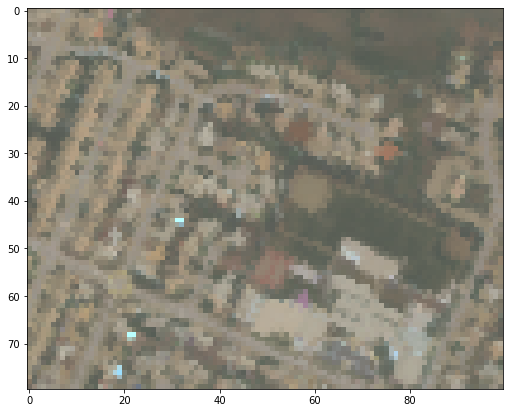

In [12]:
fig = plt.figure(figsize = (12, 7))
r = image_0[:,:,54]
g = image_0[:,:,34]
b = image_0[:,:,16]
img = np.dstack((r, g, b))*10
plt.imshow(img);

z = np.ones((image_0.shape[0], image_0.shape[1]))
img = np.dstack((z, z, z))
plt.imshow(img, alpha = 0.3)

In [13]:
inits[0].shape

(7, 335)

In [14]:
len(inits)

12

In [15]:
spectral_assignments = np.zeros((12,8000,335)) 

In [16]:
for i in range(len(labels)): # 12 times
    assignments = labels[i].copy() # 8000 elements
    for j in range(assignments.shape[0]):
        if assignments[j] == 0:
            spectral_assignments[i][j] = inits[i][0]
        elif assignments[j] == 1:
            spectral_assignments[i][j] = inits[i][1]
        elif assignments[j] == 2:
            spectral_assignments[i][j] = inits[i][2]
        elif assignments[j] == 3:
            spectral_assignments[i][j] = inits[i][3]
        elif assignments[j] == 4:
            spectral_assignments[i][j] = inits[i][4]
        elif assignments[j] == 5:
            spectral_assignments[i][j] = inits[i][5]
        else: 
            spectral_assignments[i][j] = inits[i][6]
        

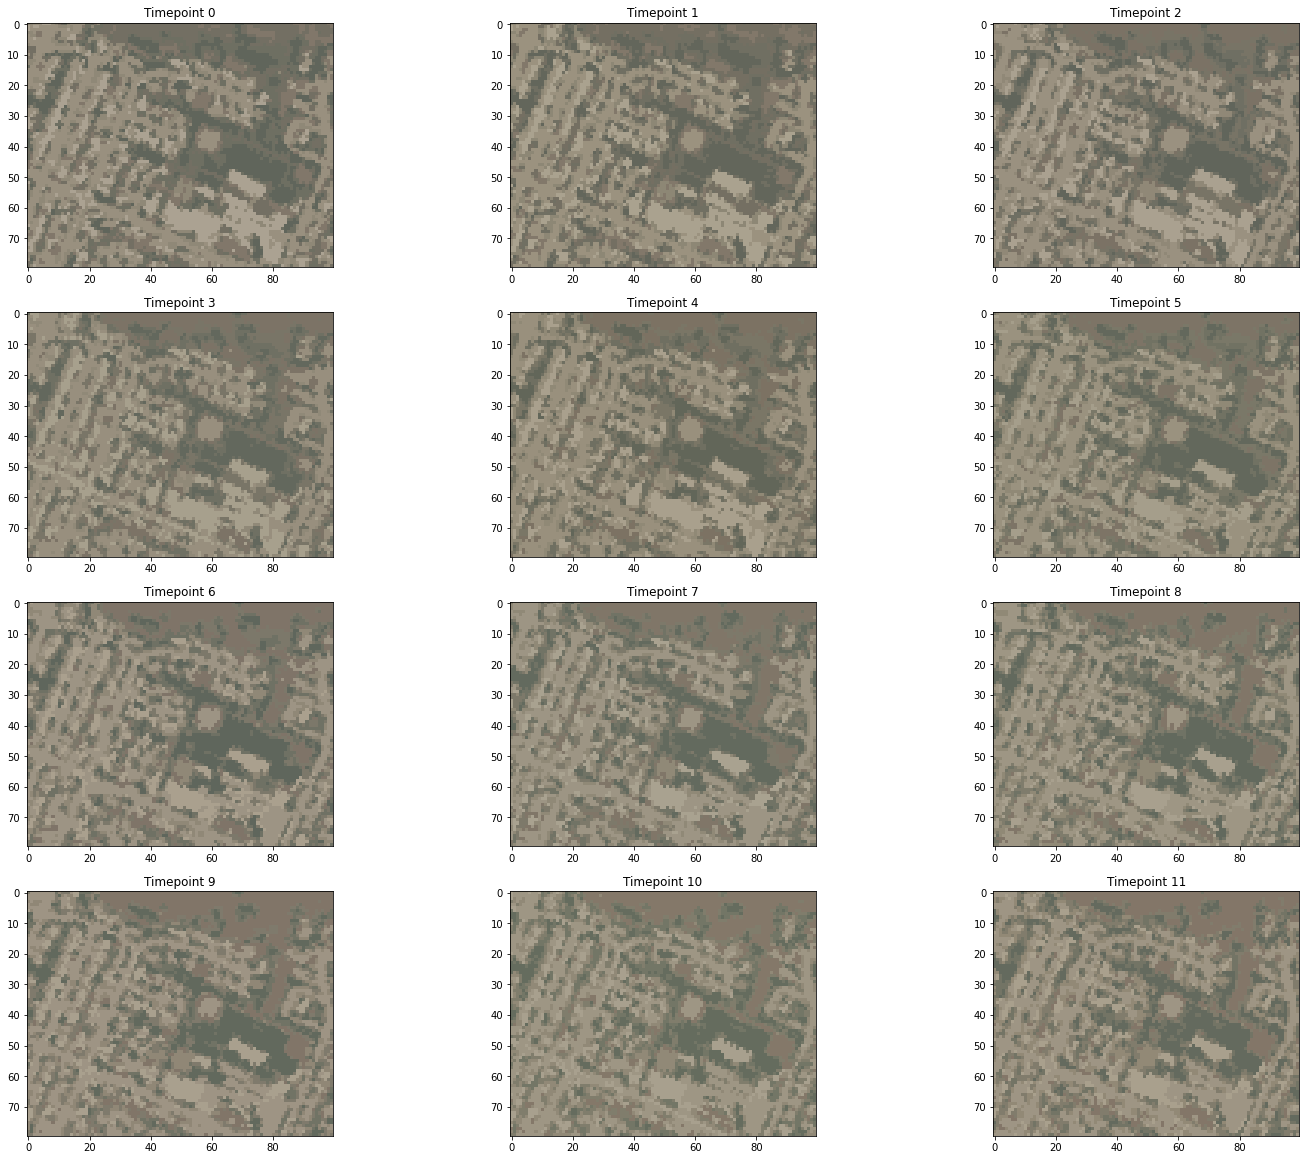

In [18]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,16), constrained_layout = True)

row = 0
col = 0
for i in range(spectral_assignments.shape[0]):
    if col == 3:
        row += 1
        col = 0
        
    img = spectral_assignments[i].reshape((80,100,335)).copy()
        
    r = img[:,:,54]
    g = img[:,:,34]
    b = img[:,:,16]
    img = np.dstack((r, g, b))*10
    axs[row,col].imshow(img);

    z = np.ones((img.shape[0], img.shape[1]))
    img = np.dstack((z, z, z))
    axs[row,col].imshow(img, alpha = 0.3)
    
    axs[row,col].set_title('Timepoint ' + str(i))
    col+= 1
    

In [19]:
combined = np.concatenate((spectra['20220224'], spectra['20220228'], spectra['20220308'], spectra['20220316'], spectra['20220322'], spectra['20220405'], \
                          spectra['20220412'], spectra['20220420'], spectra['20220503'], spectra['20220511'], spectra['20220517'], spectra['20220529']))

In [20]:
combined.shape

(960, 100, 335)

In [21]:
combined_reshaped = combined.reshape((combined.shape[0]*combined.shape[1], combined.shape[2]))

In [22]:
seed = 8

kmeans = KMeans(init = 'k-means++', n_clusters = 4, random_state = seed).fit(combined_reshaped)

In [23]:
Z = kmeans.predict(combined_reshaped)
clusterCount = np.bincount(kmeans.labels_)
print(clusterCount)

[37816 18235 17416 22533]


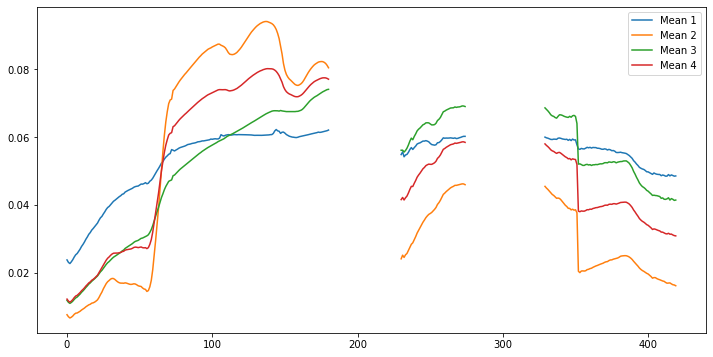

In [25]:
cluster_inits = kmeans.cluster_centers_
mean_display = np.empty((4, 425))
mean_display[:] = np.nan

plt.figure(figsize = (12,6))
for i in range(4):
    mean_display[i, 0:181] = cluster_inits[i][0:181]
    mean_display[i, 230:275] = cluster_inits[i][188:233]
    mean_display[i, 329:420] = cluster_inits[i][233:324]
    plt.plot(mean_display[i], label = 'Mean ' + str(i+1))
plt.legend()

In [26]:
assignments = kmeans.labels_.copy()
print(assignments.shape)
assignments_reshapen = assignments.reshape((12,8000))
print(assignments_reshapen.shape)

(96000,)
(12, 8000)


In [27]:
rgb_assignments = np.zeros((12,8000,335)) 
for i in range(assignments_reshapen.shape[0]): # 12 times
    for j in range(assignments_reshapen.shape[1]): # 8000 times
        if assignments_reshapen[i][j] == 0:
            rgb_assignments[i][j] = cluster_inits[0]
        elif assignments_reshapen[i][j] == 1:
            rgb_assignments[i][j] = cluster_inits[1]
        elif assignments_reshapen[i][j] == 2:
            rgb_assignments[i][j] = cluster_inits[2]
        else: 
            rgb_assignments[i][j] = cluster_inits[3]

In [28]:
clustered_images = []
for i in range(12):
    im = rgb_assignments[i].copy()
    im = im.reshape((80,100,335))
    clustered_images.append(im)

clustered_images = np.array(clustered_images)
clustered_images_reshapen = clustered_images.reshape((4,3,80,100,335))

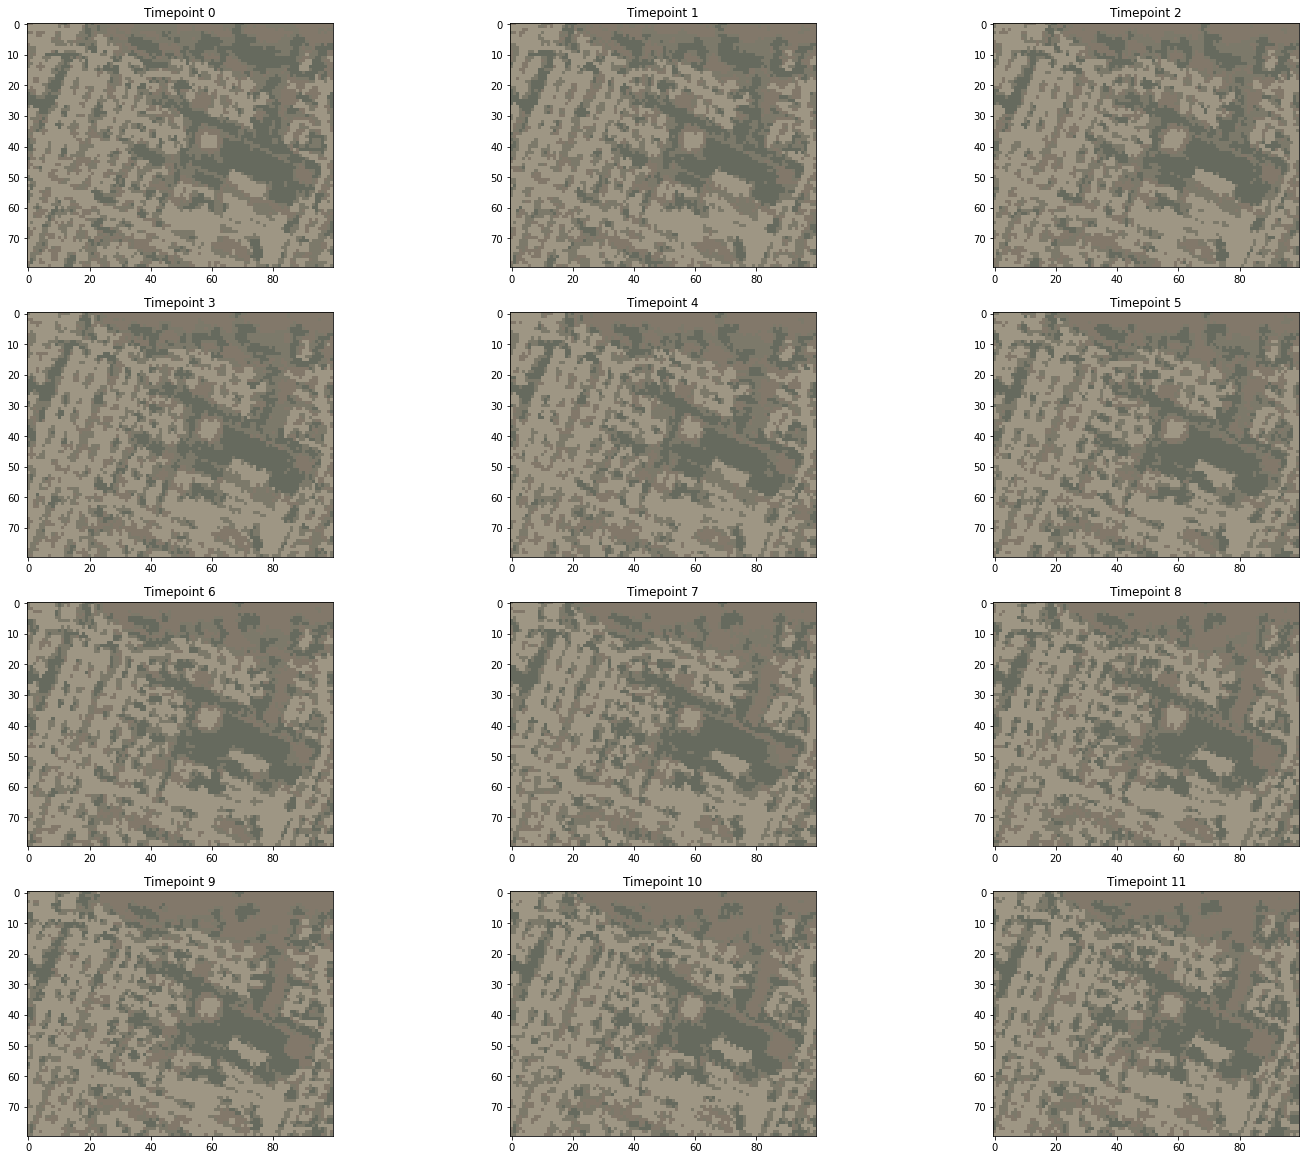

In [30]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,16), constrained_layout = True)

row = 0
col = 0
for i in range(12):
    if col == 3:
        row += 1
        col = 0
    img = clustered_images_reshapen[row,col].reshape((80,100,335)).copy()
            
    r = img[:,:,54]
    g = img[:,:,34]
    b = img[:,:,16]
    img = np.dstack((r, g, b))*10
    axs[row,col].imshow(img);

    z = np.ones((img.shape[0], img.shape[1]))
    img = np.dstack((z, z, z))
    axs[row,col].imshow(img, alpha = 0.3)
    
    axs[row,col].set_title('Timepoint ' + str(i))
    col+= 1
    